In [ ]:
#| default_exp score

# score

> Functions for scoring predicted ARC grids against ground truth output grids

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
import numpy as np
from arcsolver.task import ArcGrid, ArcPair

We need a way of evaluating predicted ARC grids against the true output grids.

A simple approach is to calculate the proportion of correct cells.

In [ ]:
def score(
    truth: ArcGrid,  # True ARC grid
    pred: ArcGrid    # Predicted ARC grid
) -> float:
    "Score a predicted grid against the true grid"
    if pred == truth: return 1.0

    return float(np.mean(pred.data == truth.data))

In [ ]:
pair = ArcPair(input_grid = np.array([[1,2,3],[4,5,6]]),
               output_grid = np.array([[3,2,1],[4,5,6]]))

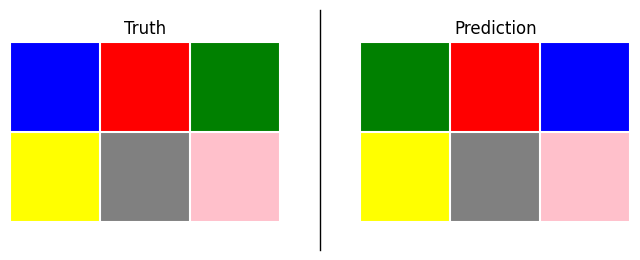

In [ ]:
pair.plot(titles=['Truth', 'Prediction'])

In [ ]:
score(*pair)

0.6666666666666666


Often the predicted grid has the wrong shape. We could simply return 0.0. Instead, let's pad the grids to be equal shape and assign partial credit to correctly predicted cells in the overlapping region

In [ ]:
#| exports
def score(
    truth: ArcGrid,         # True ARC grid
    pred: ArcGrid | None    # Predicted ARC grid
) -> float:
    "Score a predicted grid against the true grid"
    if pred is None: return 0.0
    if pred == truth: return 1.0
    
    # Calculate shape penalty
    rows_ratio = min(truth.shape[0], pred.shape[0]) / max(truth.shape[0], pred.shape[0])
    cols_ratio = min(truth.shape[1], pred.shape[1]) / max(truth.shape[1], pred.shape[1])
    shape_penalty = rows_ratio * cols_ratio

    # Get overlapping region dimensions
    overlap_rows = min(truth.shape[0], pred.shape[0])
    overlap_cols = min(truth.shape[1], pred.shape[1])

    # Calculate color accuracy in overlapping region
    true_overlap = truth.data[:overlap_rows, :overlap_cols]
    pred_overlap = pred.data[:overlap_rows, :overlap_cols]
    color_accuracy = np.mean(true_overlap == pred_overlap)

    return float(shape_penalty * color_accuracy)

In [ ]:
score(*pair)

0.6666666666666666

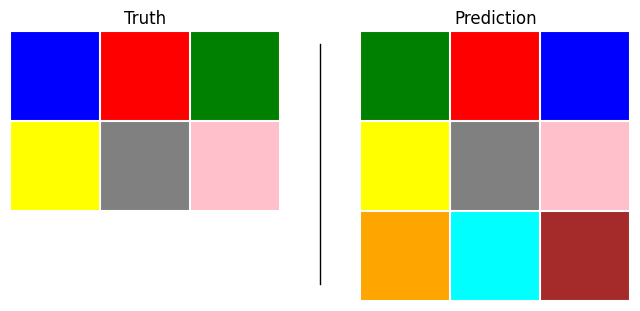

In [ ]:
pair = ArcPair(input_grid = np.array([[1,2,3],[4,5,6]]),
               output_grid = np.array([[3,2,1],[4,5,6], [7,8,9]]))
pair.plot(titles=['Truth', 'Prediction'])

In [ ]:
score(*pair)

0.4444444444444444

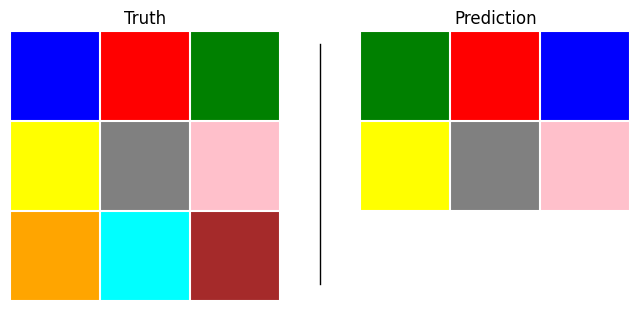

In [ ]:
pair = ArcPair(input_grid = np.array([[1,2,3],[4,5,6],[7,8,9]]),
               output_grid = np.array([[3,2,1],[4,5,6]]))
pair.plot(titles=['Truth', 'Prediction'])

In [ ]:
score(*pair)

0.4444444444444444

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()